In [1]:
from tensorflow import keras
import stacked_generalization as sg
from npztonp import npztonp
import numpy as np
import pandas as pd
import os

C:\Users\engin\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py


In [2]:
dataset="72" # 72,164,186,355,448 for feature size of 39; 355,448 for feature size of 51
window_size="7" # 7,15,31,51
thrshld=0.93 # between 0 and 1
start_input=-2
fold_no=1 # 1,2,3,4,5
feature_size=39 # 39 or 51
thrs=str(thrshld).split(".")

In [3]:
mdl_fld='../models/models_stacking_'+thrs[0] \
    +'_'+thrs[1]+'/stacking_'+window_size \
    +'_'+str(feature_size)+'_'+thrs[0]+'_'+thrs[1] \
    +'/model_ensb_fold/fold_'+str(fold_no)+'/model.tf'
model = keras.models.load_model(mdl_fld)

In [4]:
if feature_size==39: dataset_type="non_SS_PSI"
if feature_size==51: dataset_type="SS_PSI"
try:
    npzfiles_dir="../datasets/"+dataset_type+"/datasets_"+window_size+"/"
    X=npztonp(np.load(npzfiles_dir+'X_'+dataset+'.npz'))
    y=npztonp(np.load(npzfiles_dir+'y_'+dataset+'.npz'))
except:
    print("This testing set is not suitable for this feature_size, choose another one!")
    raise

In [5]:
if not os.path.exists("./demo/"): os.mkdir("./demo/")
model_dir="./demo/"+dataset_type+"/"
if not os.path.exists(model_dir): os.mkdir(model_dir)
model_dir="./demo/"+dataset_type+"/"+dataset+"_"+window_size+"/"
if not os.path.exists(model_dir): os.mkdir(model_dir)
X_decoder_input=np.full((X.shape[0],), start_input)
X_decoder_input=np.reshape(X_decoder_input,(X_decoder_input.shape[0],1,1))

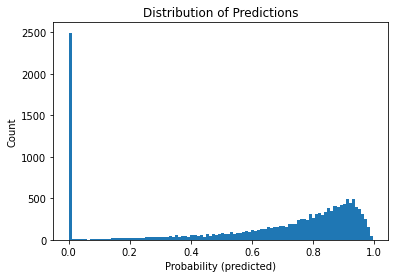

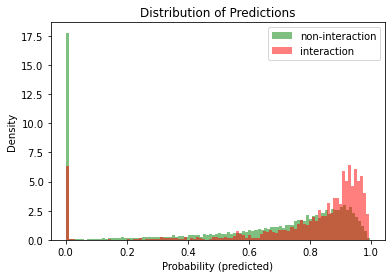

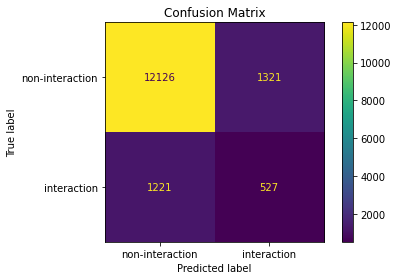

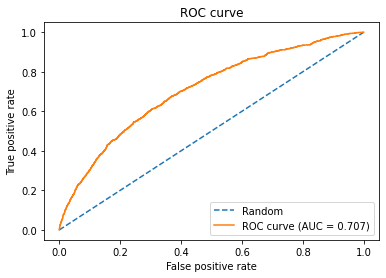

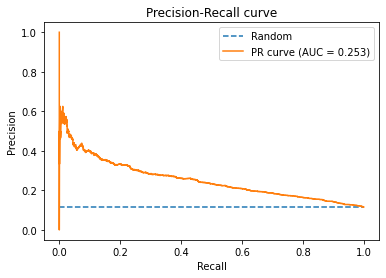

[[12126  1321]
 [ 1221   527]]
              precision    recall  f1-score   support

           0      0.909     0.902     0.905     13447
           1      0.285     0.301     0.293      1748

    accuracy                          0.833     15195
   macro avg      0.597     0.602     0.599     15195
weighted avg      0.837     0.833     0.835     15195

            Sensitivity Specificity Precision  Accuracy        F1       MCC     AUROC     AUPRC  Balanced Accuracy
72_macro       0.601625        None  0.596846  0.832708  0.599116  0.198413  0.707226  0.252771           0.601625
72_weighted    0.832708        None   0.83681  0.832708  0.834722  0.198413  0.707226  0.252771           0.601625
72_0           0.901762    0.301487  0.908519  0.832708  0.905128  0.198413  0.707226  0.252771           0.601625
72_1           0.301487    0.901762  0.285173  0.832708  0.293103  0.198413  0.707226  0.252771           0.601625


In [6]:
metrics_results=[]
sg.testset_prediction_eval(model,[X,X_decoder_input],y,model_dir,metrics_results,dataset,
                                "False","Standard","ensb",threshold=thrshld)
print(metrics_results[0])